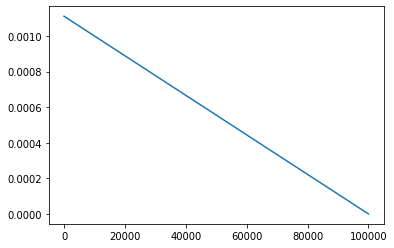

In [4]:
import matplotlib.pyplot as plt


def warmup_annealing(step, base_lrs, min_lr, warmup_steps, max_steps):
    delta_lr = base_lrs[0] - min_lr
    mult = (step - warmup_steps) / (max_steps - warmup_steps)
    out_lr = [min_lr + (1 - mult) * delta_lr for _ in base_lrs]
    return out_lr

max_steps = 100000
base_lrs = [1e-3]
min_lr = 1e-6
warmup_steps = 10000

plt.plot(list(range(max_steps)), [warmup_annealing(i,base_lrs, min_lr, warmup_steps, max_steps) for i in range(max_steps)])

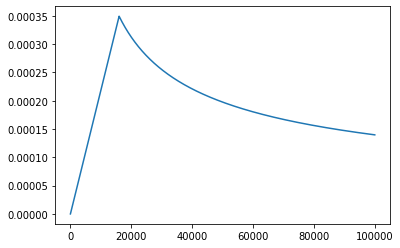

In [11]:
import matplotlib.pyplot as plt


def noam_annealing(step, normalize, initial_lr, warmup_steps, min_lr):
    mult = normalize * min(step ** (-0.5), step * (warmup_steps ** (-1.5)))
    out_lr = initial_lr * mult
    if step > warmup_steps:
        out_lr = max(out_lr, min_lr)
    return initial_lr * mult


normalize = 512 ** (-0.5)
initial_lr = 1
warmup_steps = 16000
min_lr = 1e-6
max_steps = 100000

plt.plot(list(range(1, max_steps)), [noam_annealing(i, normalize, initial_lr, warmup_steps, min_lr) for i in range(1, max_steps)])